In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches
import pylab
from scipy.optimize import fsolve


DataPath_1='./Data/Suppl_Data_FS4_Stoch_TMEVm_Theta01'
DataPath_2='./Data/Suppl_Data_FS4_Stoch_TMEVm_Theta03'


%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading time derivative functions

Once deleted, variables cannot be recovered. Proceed (y/[n])? н
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath_1):
    os.makedirs(DataPath_1)
if not os.path.isfile(DataPath_1+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS4_Stoch_TMEVm_Theta01.ipynb
if not os.path.isdir(DataPath_2):
    os.makedirs(DataPath_2)
if not os.path.isfile(DataPath_2+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS4_Stoch_TMEVm_Theta03.ipynb

  0%|          | 0/30 [00:00<?, ?it/s]

Data not found. Running Data Generation script


  0%|          | 0/30 [00:00<?, ?it/s]

Data not found. Running Data Generation script


100%|██████████| 30/30 [02:14<00:00,  4.47s/it]


In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_5examples = [viridis(0.0)[0:3],viridis(0.3)[0:3],viridis(0.55)[0:3],viridis(0.75)[0:3],viridis(0.95)[0:3]]
alpha_value=0.45
marker_sizer=2.5
dt_vis=30


h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

In [4]:
##### Plotting right panel with simulation data #####
# First masking the data and calculating the statistics for days corresponding to animal model data (for masking procedure explained, see Appendix) #
data = load_animal_model_data('Kirkman_et_al_2010')
days_vect=data['days_vect']
N=30

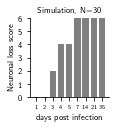

In [5]:
DataPath=DataPath_1

D_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)    
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()   
    D_array[ii]=D_vec[np.array((np.array(days_vect)/dt),'i')]

# Masking  D_array according to rules from [Kirkman et al., 2010]:
D_array[(D_array>=0.6)]=3
D_array[(D_array>=0.3)==(D_array<0.6)]=2
D_array[(D_array>=0.1)==(D_array<0.3)]=1
D_array[D_array<0.1]=0
# Doubling everything to the form of  [Kirkman et al., 2010]:
D_array=D_array*2
    
D_mean_vect=np.mean(D_array,axis=0)
D_std_vect=np.std(D_array,axis=0)
D_sem_vect=D_std_vect/np.sqrt(N)


# plotting # 

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)  

rects1 = ax.bar(np.arange(0,len(days_vect)), D_mean_vect, color='grey')
err1, cl, _ = ax.errorbar(np.arange(0,len(days_vect)), D_mean_vect, yerr=D_sem_vect, lolims=True, capsize = 5/size_scaler, ls='None', color='grey')
cl[0].set_marker('_')
cl[1].set_marker('')  # to remove the lower cap

plt.ylim([0,6])
plt.xticks(np.arange(0,len(days_vect)), days_vect)
ytix=list(np.arange(0,7))
plt.yticks(np.arange(0,7),ytix)
plt.xticks(np.arange(0,len(days_vect)), days_vect)
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(6) 

plt.xlabel('days post infection')
plt.ylabel('Neuronal loss score')
plt. title ('Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w) 
fig.savefig('./Figures/Supplementary/Fig_S4B.pdf')

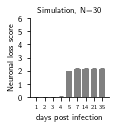

In [6]:
DataPath=DataPath_2

D_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)    
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()   
    D_array[ii]=D_vec[np.array((np.array(days_vect)/dt),'i')]

# Masking  D_array according to rules from [Kirkman et al., 2010]:
D_array[(D_array>=0.6)]=3
D_array[(D_array>=0.3)==(D_array<0.6)]=2
D_array[(D_array>=0.1)==(D_array<0.3)]=1
D_array[D_array<0.1]=0
# Doubling everything to the form of  [Kirkman et al., 2010]:
D_array=D_array*2
    
D_mean_vect=np.mean(D_array,axis=0)
D_std_vect=np.std(D_array,axis=0)
D_sem_vect=D_std_vect/np.sqrt(N)


# plotting # 

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)  

rects1 = ax.bar(np.arange(0,len(days_vect)), D_mean_vect, color='grey')
err1, cl, _ = ax.errorbar(np.arange(0,len(days_vect)), D_mean_vect, yerr=D_sem_vect, lolims=True, capsize = 5/size_scaler, ls='None', color='grey')
cl[0].set_marker('_')
cl[1].set_marker('')  # to remove the lower cap

plt.ylim([0,6])
plt.xticks(np.arange(0,len(days_vect)), days_vect)
ytix=list(np.arange(0,7))
plt.yticks(np.arange(0,7),ytix)
plt.xticks(np.arange(0,len(days_vect)), days_vect)
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(6) 

plt.xlabel('days post infection')
plt.ylabel('Neuronal loss score')
plt. title ('Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w) 
fig.savefig('./Figures/Supplementary/Fig_S4D.pdf')